**Exercise 1**

**Part 1**

g(x) is quadratic function where:

$g(x_1, x_2) = (x_1+49)^2 + (x_2-36)^2 = x_1^2 + x_2^2 + 98x_1 - 72x_2 + 3697$

$g(\mathbf{x}) = \mathbf{x}^T\begin{bmatrix}1 \ \ 0\\ 0 \ \  1\end{bmatrix}\mathbf{x} + \begin{bmatrix}98 \ \ -72\end{bmatrix}\mathbf{x} + 3697$

where A is 2*2 identity matrix, $\mathbf{x} = \begin{bmatrix} x_1  \\ x_2 \end{bmatrix}$ and b is given above.


$f(x_1, x_2) = 256(x_2-x_1^2)^2 + (2-x_1)^2$ we see that there are two square terms so function is always positive, hence minimum value must be 0. We can easily see that for $x_1 =2$ second term goes to 0 and when we put $x_1=2$ in the first term then for $x_2 = 4$ the function will result in whole function value to be 0. Hence, the minimizer for f(x ) will be $(2,4)$.

Now for $g(x_1, x_2) = (x_1+49)^2 + (x_2-36)^2$, we can easily see that $(-49, 36)$ give minimum value and objective value is 0.We can find it with other methods also but here one can easily see that at $(-49,36)$ gives minimum value of the function g(x) and we achieve the lowest possible value which is 0 as in g(x) there are two square term so minimum possible value is 0.

**Part 2**

Analytical solution to
$
arg\,min_{\alpha \geq 0} \quad g(x-\alpha \nabla g(x))
$

Note that $\nabla g(x)=\left\langle 2\left(x_1+49\right), 2\left(x_2-36\right)\right\rangle$
$
\Rightarrow x-\alpha \nabla g(x)=\left\langle x_1-2 \alpha\left(x_1+49\right), x_2-2 \alpha\left(x_2-36\right)\right\rangle
$
$\Rightarrow g(x-\alpha \nabla g(x))=\left(x_1-2 \alpha\left(x_1+49\right)+49\right)^2 +\left(x_2-2 \alpha\left(x_2-36\right)-36\right)^2 \\
= \quad\left(x_1+49\right)^2(1-2 \alpha)^2+\left(x_2-36\right)^2(1-2 \alpha)^2
$

Assuming $\quad \gamma(\alpha)=g(x-\alpha \nabla g(x))$

Minimizing $\gamma(\alpha)$ will result in $\operatorname{argmin}_{\alpha \geqslant 0} g(x-\alpha \nabla g(x))$

For minimizing the above function $\gamma(\alpha)$ we differentiate it with respect to $\alpha$ and find the value of $\alpha$ which is 0.5 and then check whether it give mimima or maxima,and we see that it is minima (calculated in copy)

Therefore, $\alpha = 0.5$ is the exact line search coefficient which is in closed form.

$$
\min _{\alpha \geqslant 0} f(x-\alpha \nabla f(x)) .
$$

Note that,
$$
\nabla f=\left\langle 1024 x_1\left(x_1^2-x_2\right)+2 x_1-4,-512 x_1^2+512 x_2\right\rangle
$$

Therefore
$$
\begin{aligned}
& \underset{\alpha>0}{\operatorname{argmin}} f(x-\alpha \nabla f) \\
& =f\left(x_1-\alpha\left(1024 x_1\left(x_1^2-x_2\right)+2 x_1-4\right),\quad x_2-\alpha\left(512 x_2-512 x_1^2\right)\right)
\end{aligned}
$$

This is a quartic function in $\alpha$ and will not have a unique sol ${ }^n$ for $\operatorname{argmin}_{\alpha \geqslant 0}$.
Closed form solution may exist but it is very hard to calculate it and will not be unique i.e. dependent of $x_1 $ and $ x_2$

**part 3**

<Axes: >

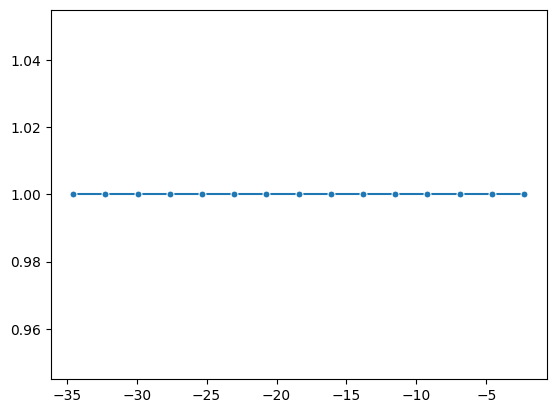

In [14]:
# Algorithm - 1

from numpy.linalg import norm
import numpy as np
import matplotlib.pyplot as plt

taus = [10**(-p) for p in range(1, 16)]
x0 = np.array([36,-49])

def gradg(xk):
  x1 = xk[0]
  x2 = xk[1]
  return np.array([-2*(x1+49), -2*(x2-36)])

def gx(x1,x2):
  return (x1 + 49)**2 + (x2-36)**2

iterations = []
for tau in taus:
  xk = np.copy(x0)
  iteration = 0
  pk = gradg(xk)

  while norm(pk)>tau:
    step = 0.5    # analytic solution of step length from part 2
    xk = xk + step*pk
    pk = gradg(xk)
    iteration += 1

  iterations.append(iteration)

# importing library
import seaborn as sns
sns.lineplot(x= np.log(taus),y=  iterations, marker= '.', markersize = 10)


<Axes: >

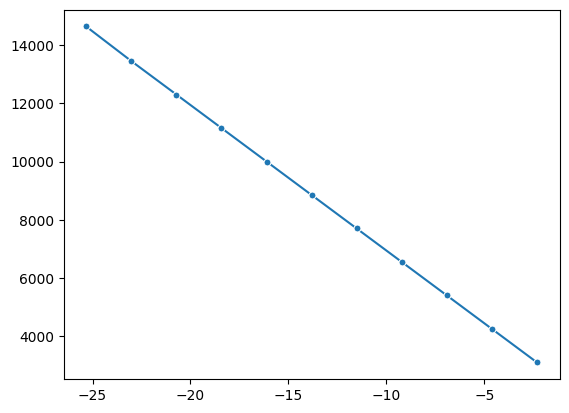

In [16]:
# Algorithm - 2
alpha = 0.001
x0 = np.array([-30,20])

taus = [10**(-p) for p in range(1,12)] # ignored some taus because code is not running for all values

iterations2= []

for tau in taus:
  xk = np.copy(x0)
  iteration = 0
  pk = gradg(xk)

  while norm(pk) > tau:
    xk = xk + alpha*pk
    pk = gradg(xk)
    iteration += 1

  iterations2.append(iteration)

import seaborn as sns

sns.lineplot(x= np.log(taus),y=  iterations2, marker= '.', markersize = 10)




Upon comparing and examining the two plots presented earlier, it becomes evident that Algorithm 1, employing an exact line search, successfully resolves all cases in a single step. On the contrary, Algorithm 2, utilizing a constant step size, exhibits an increase in iteration count as the tolerance level decreases. The reason behind this trend lies in the fact that, as the tolerance tightens, more steps are required to diminish the gradient to zero. Consequently, this necessitates a greater number of iterations to achieve the desired outcome, reflecting an inverse relationship between tolerance level and iteration count.

**level curve**

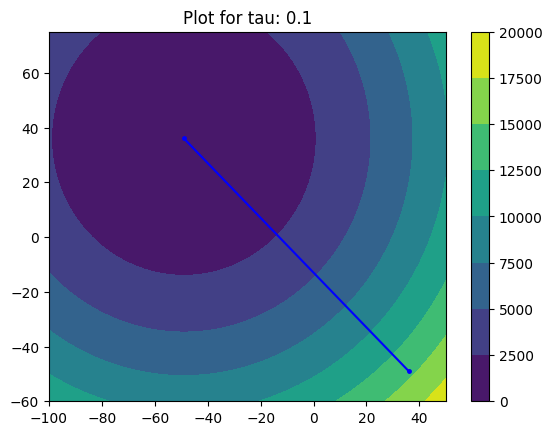

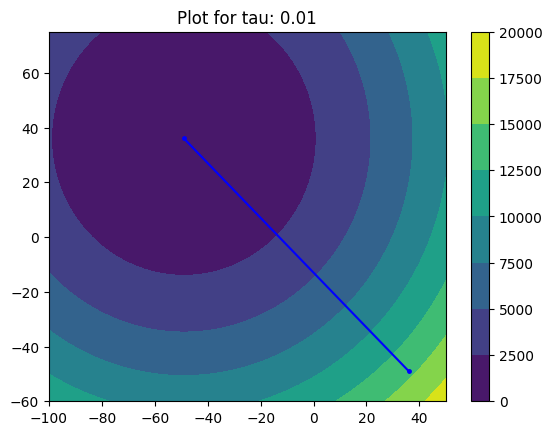

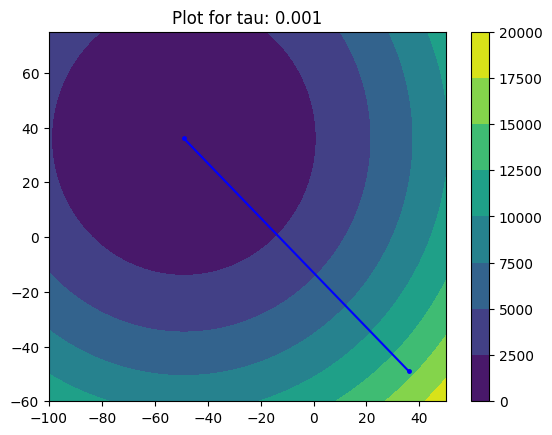

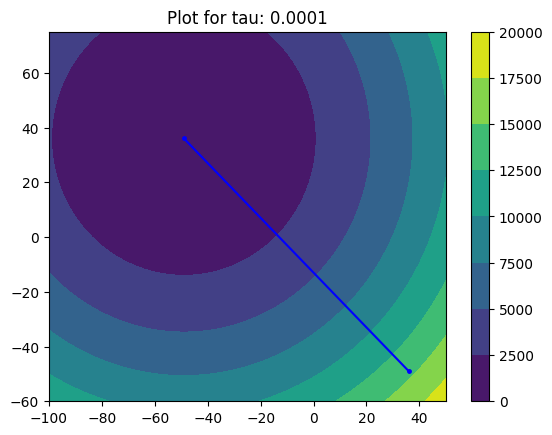

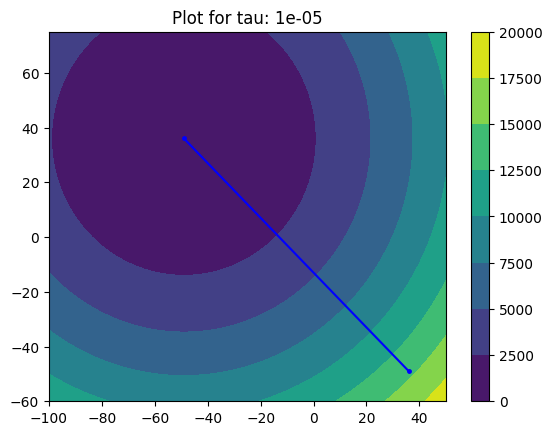

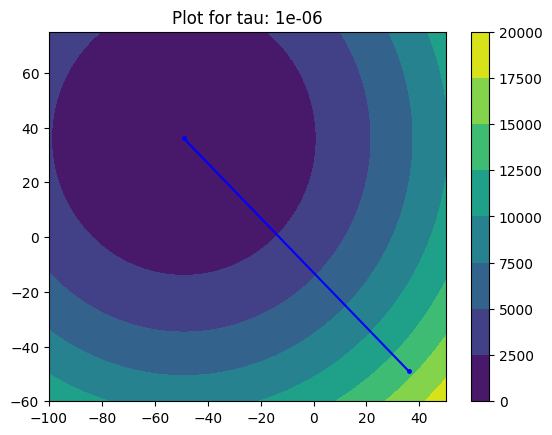

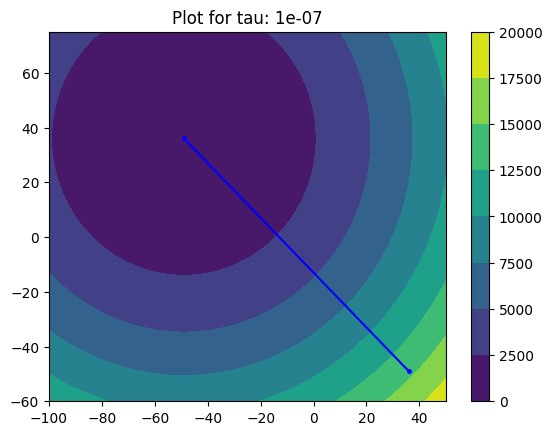

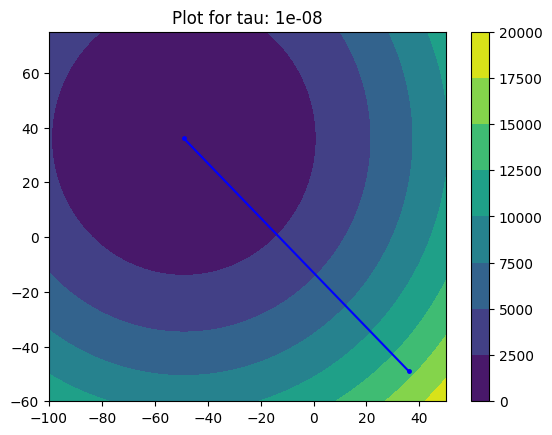

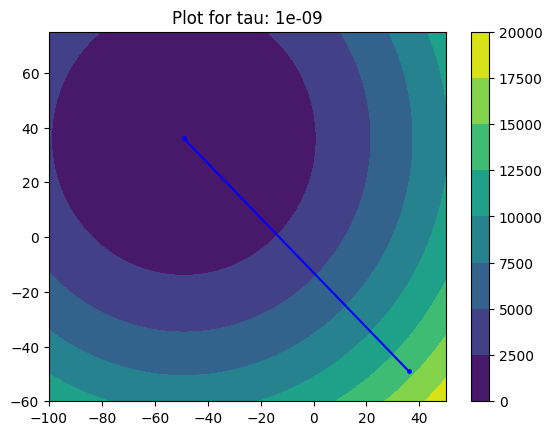

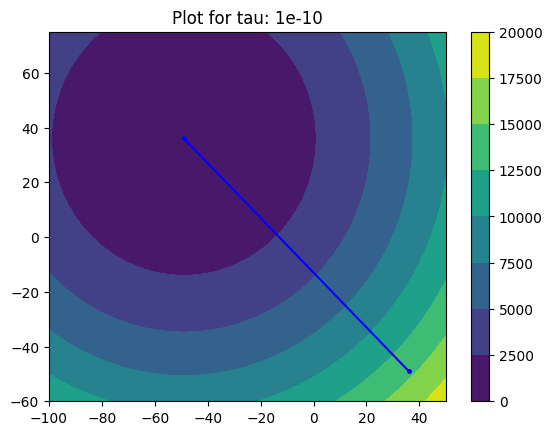

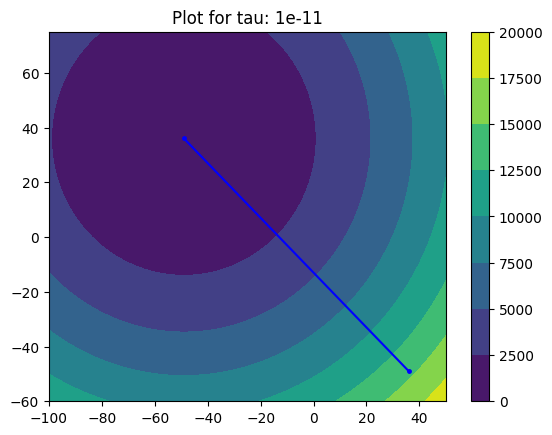

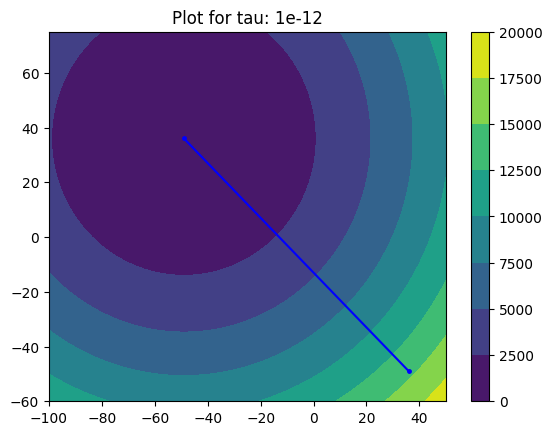

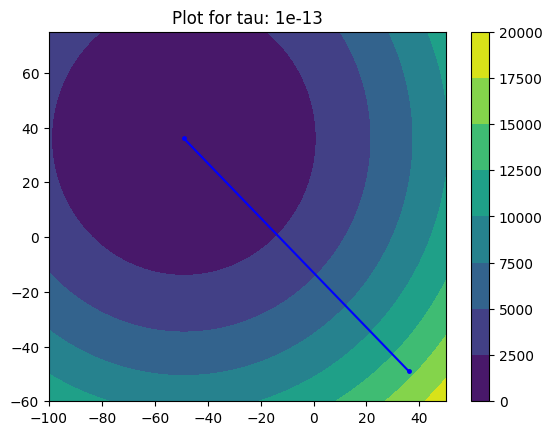

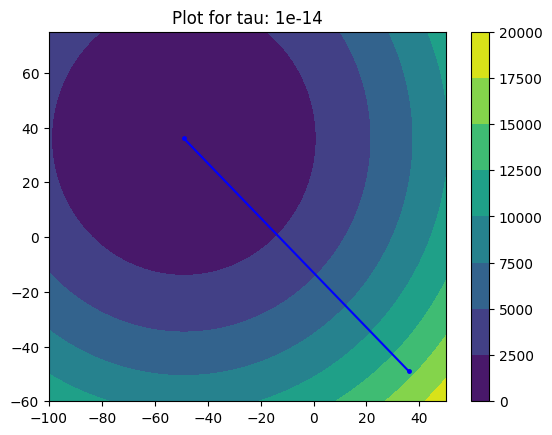

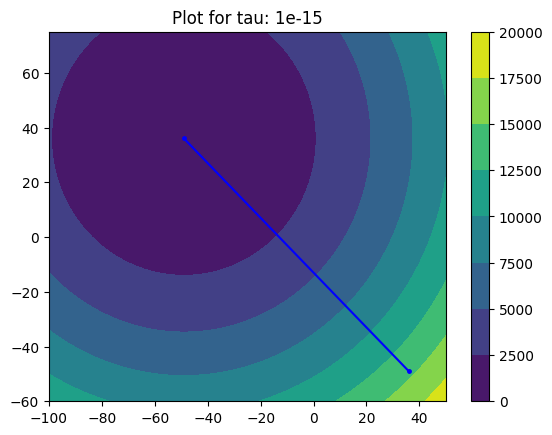

In [18]:
taus = [10**(-p) for p in range(1, 16)]
x0 = np.array([36,-49])

def gradg(xk):
  x1 = xk[0]
  x2 = xk[1]
  return np.array([-2*(x1+49), -2*(x2-36)])

def gx(x1,x2):
  return (x1 + 49)**2 + (x2-36)**2

iterations = []
for tau in taus:
  xk = np.copy(x0)
  iteration= 0
  pk = gradg(xk)


  x = np.linspace(-100, 50, 1000)
  y = np.linspace(-60, 75, 1000)
  X, Y = np.meshgrid(x, y)
  Z = gx(X,Y)
  p = plt.contourf(X,Y,Z)  #,locator = ticker.LogLocator()
  cbar = plt.colorbar(p)


  xc = []
  yc = []
  xc.append(xk[0])
  yc.append(xk[1])

  while norm(pk)>tau:
    step = 0.5    # closed form solution of step length from part 2
    xk = xk + step*pk
    xc.append(xk[0])
    yc.append(xk[1])
    pk = gradg(xk)
    iteration += 1

  plt.plot(xc,yc, marker='.', color="blue", markersize = 5)
  plt.title("Plot for tau: "+str(tau))
  plt.show()
  iterations.append(iteration)

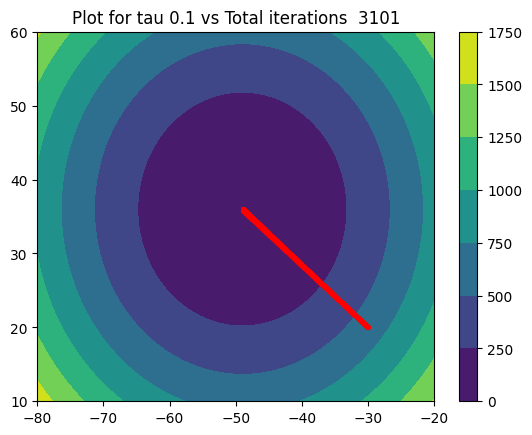

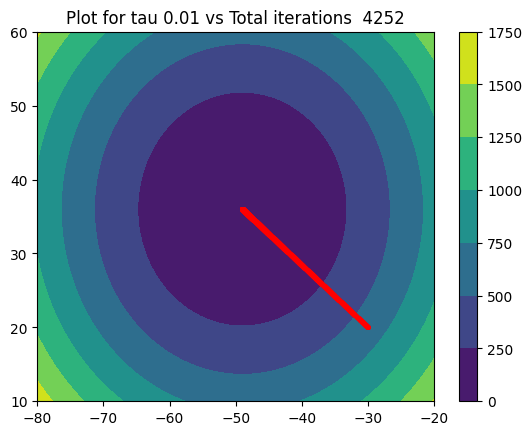

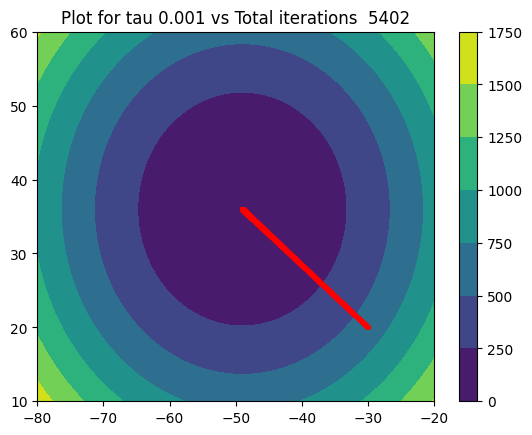

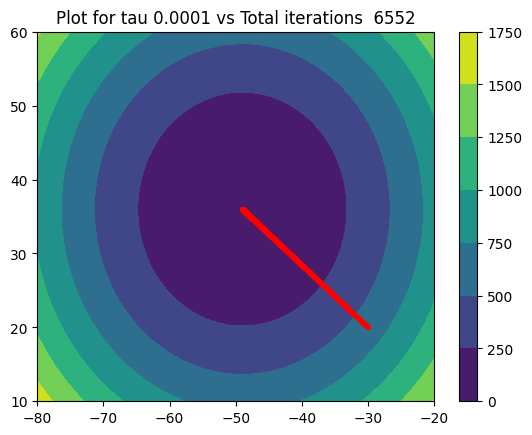

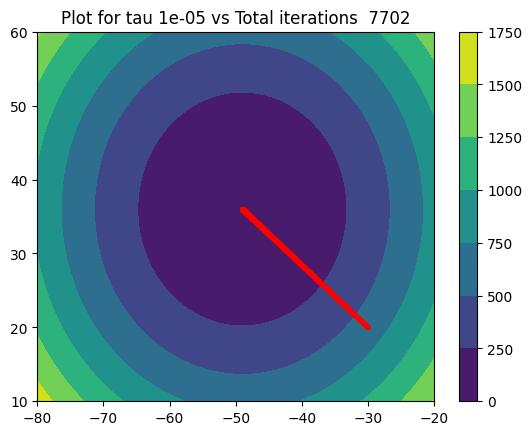

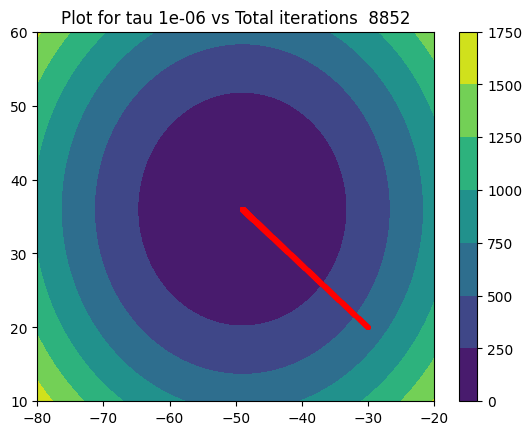

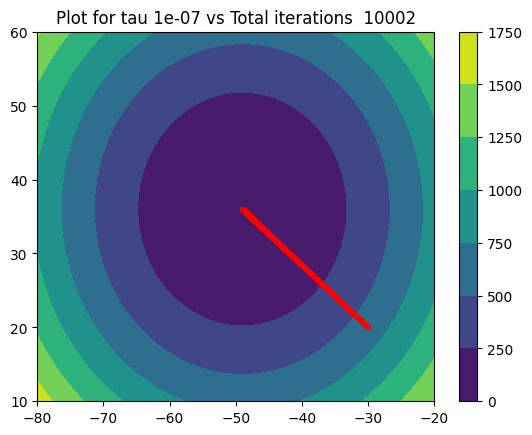

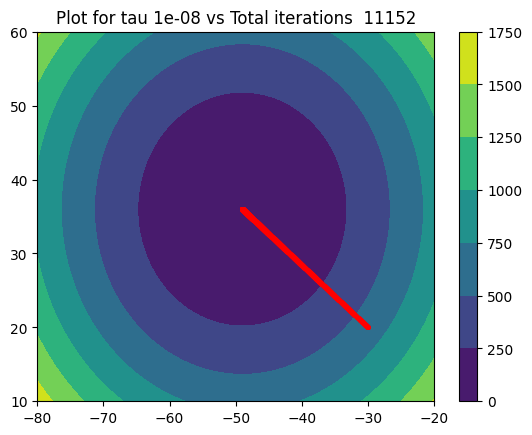

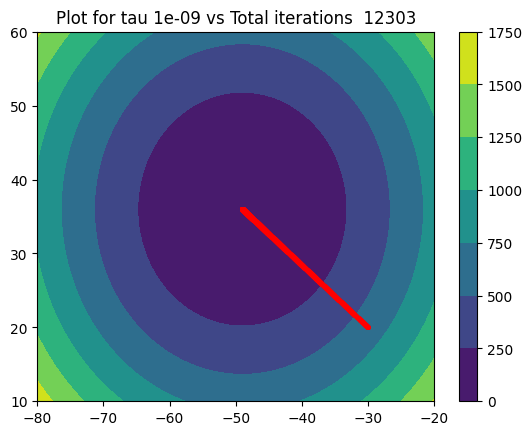

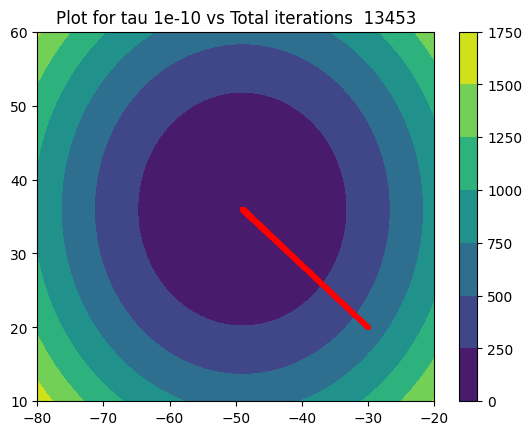

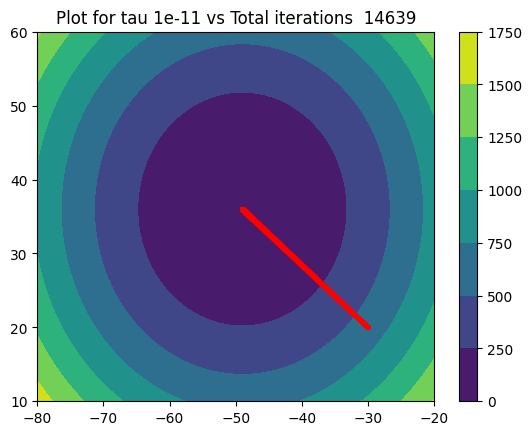

In [20]:
alpha = 0.001
x0 = np.array([-30,20])

taus = [10**(-p) for p in range(1,12)]



minimizerstore = []
minimumstore = []
iterations2 = []

for tau in taus:
  xk = np.copy(x0)
  iteration = 0
  pk = gradg(xk)

  x = np.linspace(-80, -20, 1000)
  y = np.linspace(10, 60, 1000)
  X, Y = np.meshgrid(x, y)
  Z = gx(X,Y)
  p = plt.contourf(X,Y,Z)  #,locator = ticker.LogLocator()
  cbar = plt.colorbar(p)


  xc = []
  yc = []
  xc.append(xk[0])
  yc.append(xk[1])
  while norm(pk) > tau:
    xk = xk + alpha*pk
    pk = gradg(xk)
    iteration  += 1
    xc.append(xk[0])
    yc.append(xk[1])

  plt.plot(xc,yc, marker='.', color="red", markersize = 5)
  plt.title(f"Plot for tau {str(tau)} vs Total iterations  {iteration }")
  plt.show()


  minimizerstore.append(xk)
  minimumstore.append(gx(xk[0], xk[1]))
  iterations2.append(iteration )

**Part 4**

Exact line search in gradient descent aims to find the perfect step size that minimizes the objective function along the search direction. However, there are drawbacks to this approach:

**Computational Expense:** To determine the optimal step size, exact line search requires evaluating the objective function at multiple points along the search direction. This can be computationally expensive, especially in high-dimensional problems where each evaluation involves a lot of computation.

**Not Always Necessary:** In many cases, achieving convergence doesn't necessarily demand finding the exact minimum step size. Using a fixed or adaptive learning rate can be sufficient, especially for well-behaved and convex objective functions.

**Computational Overhead:** The precision gained from an exact line search might not be worth the additional computational overhead in some situations. Approximate methods like backtracking line search strike a balance between accuracy and computational efficiency.

**Limited Applicability to Non-Smooth Functions:** Exact line search methods are crafted for smooth, differentiable functions. They may not work well for non-smooth or discontinuous functions where the concept of a gradient isn't clearly defined.

In practical scenarios, due to these issues, practitioners often opt for approximate line search methods, like backtracking line search or fixed step sizes. These methods offer a good compromise between computational efficiency and convergence speed.